In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd. set_option('display.max_columns', 1000) 
pd. set_option('display.max_rows', 1000) 

In [2]:
df= pd.read_csv("H2HBABBA2988.csv")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,140106408,WAL-M trust,2019-04-17 00:00:00,2019.0,2.960538e+09,2019-03-26,20190326,20190326,20190413.0,CAD,RV,1.0,NaN,14515.11,20190403.0,CA10,2.960538e+09,0
1,U001,0200726979,BJ'S corporation,2019-08-14 00:00:00,2019.0,1.929685e+09,2019-07-30,20190731,20190730,20190814.0,USD,RV,1.0,NaN,276.65,20190730.0,NAA8,1.929685e+09,0
2,U001,0200778870,C llc,2019-09-10 00:00:00,2019.0,1.929773e+09,2019-08-22,20190822,20190822,20190906.0,USD,RV,1.0,NaN,6055.28,20190822.0,NAA8,1.929773e+09,0
3,U001,0200793568,SUPE associates,2019-02-14 00:00:00,2019.0,1.928705e+09,2019-01-30,20190129,20190130,20190214.0,USD,RV,1.0,NaN,11947.09,20190130.0,NAA8,1.928705e+09,0
4,U001,0200769623,WAL-MAR co,2019-01-15 00:00:00,2019.0,1.928542e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,1.0,NaN,65940.47,20181230.0,NAH4,1.928542e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200020431,DEC co,2019-12-02 00:00:00,2019.0,1.930184e+09,2019-11-22,20191122,20191122,20191209.0,USD,RV,1.0,NaN,469.22,20191116.0,NAM4,1.930184e+09,0
49996,U001,0200705742,DOT foundation,2019-04-10 00:00:00,2019.0,1.929005e+09,2019-03-21,20190321,20190321,20190422.0,USD,RV,1.0,NaN,25220.50,20190321.0,NA32,1.929005e+09,0
49997,CA02,0140104440,SO corporation,2019-07-26 00:00:00,2019.0,2.960565e+09,2019-07-11,20190711,20190711,20190722.0,CAD,RV,1.0,NaN,62159.70,20190712.0,CA10,2.960565e+09,0
49998,U001,0200769623,WAL-MAR trust,2019-10-02 00:00:00,2019.0,1.929914e+09,2019-09-22,20190923,20190922,20191007.0,USD,RV,1.0,NaN,25092.30,20190922.0,NAH4,1.929914e+09,0


In [3]:
#Coverting to date format for creating target column
df['clear_date'] = pd.to_datetime(df['clear_date'])
df["due_in_date"]= pd.to_datetime(df.due_in_date,format='%Y%m%d')


In [4]:
#A new column is formed by subtracting the clear_date column with due_in_date column
df["target_clear_date"]=df["clear_date"] - df["due_in_date"]
df["target_clear_date"]=df["target_clear_date"]/np.timedelta64(1,"D")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target_clear_date
0,CA02,140106408,WAL-M trust,2019-04-17,2019.0,2.960538e+09,2019-03-26,20190326,20190326,2019-04-13,CAD,RV,1.0,NaN,14515.11,20190403.0,CA10,2.960538e+09,0,4.0
1,U001,0200726979,BJ'S corporation,2019-08-14,2019.0,1.929685e+09,2019-07-30,20190731,20190730,2019-08-14,USD,RV,1.0,NaN,276.65,20190730.0,NAA8,1.929685e+09,0,0.0
2,U001,0200778870,C llc,2019-09-10,2019.0,1.929773e+09,2019-08-22,20190822,20190822,2019-09-06,USD,RV,1.0,NaN,6055.28,20190822.0,NAA8,1.929773e+09,0,4.0
3,U001,0200793568,SUPE associates,2019-02-14,2019.0,1.928705e+09,2019-01-30,20190129,20190130,2019-02-14,USD,RV,1.0,NaN,11947.09,20190130.0,NAA8,1.928705e+09,0,0.0
4,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,1.928542e+09,2018-12-30,20181229,20181230,2019-01-14,USD,RV,1.0,NaN,65940.47,20181230.0,NAH4,1.928542e+09,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200020431,DEC co,2019-12-02,2019.0,1.930184e+09,2019-11-22,20191122,20191122,2019-12-09,USD,RV,1.0,NaN,469.22,20191116.0,NAM4,1.930184e+09,0,-7.0
49996,U001,0200705742,DOT foundation,2019-04-10,2019.0,1.929005e+09,2019-03-21,20190321,20190321,2019-04-22,USD,RV,1.0,NaN,25220.50,20190321.0,NA32,1.929005e+09,0,-12.0
49997,CA02,0140104440,SO corporation,2019-07-26,2019.0,2.960565e+09,2019-07-11,20190711,20190711,2019-07-22,CAD,RV,1.0,NaN,62159.70,20190712.0,CA10,2.960565e+09,0,4.0
49998,U001,0200769623,WAL-MAR trust,2019-10-02,2019.0,1.929914e+09,2019-09-22,20190923,20190922,2019-10-07,USD,RV,1.0,NaN,25092.30,20190922.0,NAH4,1.929914e+09,0,-5.0


In [5]:
df.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
target_clear_date         10000
dtype: int64

## Removing the data points where the target value is null

## Target column is the target_clear_date

In [6]:
main_train = df[df.target_clear_date.isnull()==False]
main_test =  df[df.target_clear_date.isnull()==True]

In [7]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target_clear_date
0,CA02,140106408,WAL-M trust,2019-04-17,2019.0,2.960538e+09,2019-03-26,20190326,20190326,2019-04-13,CAD,RV,1.0,NaN,14515.11,20190403.0,CA10,2.960538e+09,0,4.0
1,U001,0200726979,BJ'S corporation,2019-08-14,2019.0,1.929685e+09,2019-07-30,20190731,20190730,2019-08-14,USD,RV,1.0,NaN,276.65,20190730.0,NAA8,1.929685e+09,0,0.0
2,U001,0200778870,C llc,2019-09-10,2019.0,1.929773e+09,2019-08-22,20190822,20190822,2019-09-06,USD,RV,1.0,NaN,6055.28,20190822.0,NAA8,1.929773e+09,0,4.0
3,U001,0200793568,SUPE associates,2019-02-14,2019.0,1.928705e+09,2019-01-30,20190129,20190130,2019-02-14,USD,RV,1.0,NaN,11947.09,20190130.0,NAA8,1.928705e+09,0,0.0
4,U001,0200769623,WAL-MAR co,2019-01-15,2019.0,1.928542e+09,2018-12-30,20181229,20181230,2019-01-14,USD,RV,1.0,NaN,65940.47,20181230.0,NAH4,1.928542e+09,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200020431,DEC co,2019-12-02,2019.0,1.930184e+09,2019-11-22,20191122,20191122,2019-12-09,USD,RV,1.0,NaN,469.22,20191116.0,NAM4,1.930184e+09,0,-7.0
49996,U001,0200705742,DOT foundation,2019-04-10,2019.0,1.929005e+09,2019-03-21,20190321,20190321,2019-04-22,USD,RV,1.0,NaN,25220.50,20190321.0,NA32,1.929005e+09,0,-12.0
49997,CA02,0140104440,SO corporation,2019-07-26,2019.0,2.960565e+09,2019-07-11,20190711,20190711,2019-07-22,CAD,RV,1.0,NaN,62159.70,20190712.0,CA10,2.960565e+09,0,4.0
49998,U001,0200769623,WAL-MAR trust,2019-10-02,2019.0,1.929914e+09,2019-09-22,20190923,20190922,2019-10-07,USD,RV,1.0,NaN,25092.30,20190922.0,NAH4,1.929914e+09,0,-5.0


## Preprocessing

Null Imputation

In [8]:
#Dropping the record contating null value as the invoice_id is MCAR and Total stops is related + single row so doesnot matter much
main_train[main_train.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target_clear_date
4031,CA02,0140106054,TREE corporation,2019-06-17,2019.0,9.500000e+09,2019-03-29,20190329,20190322,2019-04-01,CAD,X2,1.0,NaN,25215.84,20190322.0,CA10,NaN,0,77.0
8810,CA02,0140106054,TREE,2019-05-31,2019.0,9.500000e+09,2019-03-29,20190329,20190313,2019-03-23,CAD,X2,1.0,NaN,6739.20,20190313.0,CA10,NaN,0,69.0
11973,CA02,0140104409,LOB associates,2019-12-27,2019.0,9.500000e+09,2019-03-29,20190329,20180626,2018-07-06,CAD,X2,1.0,NaN,279.60,20180626.0,CA10,NaN,0,539.0
23028,CA02,0140104409,LOB us,2019-12-27,2019.0,9.500000e+09,2019-03-29,20190329,20181126,2018-12-06,CAD,X2,1.0,NaN,420.40,20181126.0,CA10,NaN,0,386.0
23216,CA02,0140106054,TREE llc,2019-05-06,2019.0,9.500000e+09,2019-03-29,20190329,20190208,2019-02-18,CAD,X2,1.0,NaN,938.43,20190208.0,CA10,NaN,0,77.0
26241,CA02,0140104409,LOB trust,2019-05-22,2019.0,9.500000e+09,2019-03-29,20190329,20190314,2019-03-24,CAD,X2,1.0,NaN,542.00,20190314.0,CA10,NaN,0,59.0
40278,CA02,0140104223,H Y LO systems,2019-05-08,2019.0,9.500000e+09,2019-04-30,20190430,20190329,2019-04-08,CAD,X2,1.0,NaN,44416.80,20190329.0,CA10,NaN,0,30.0


In [9]:
main_train["doc_id"]=main_train.doc_id.astype(int)
main_train["buisness_year"]=main_train.buisness_year.astype(int)

In [10]:
comparison_column = np.where(main_train["doc_id"] == main_train["invoice_id"], True, False)
comparison_column

array([False,  True,  True, ..., False,  True,  True])

In [11]:
#drppping invoice_id as the doc_id and invoice_id are same in main_train
main_train.drop("invoice_id",axis=1,inplace=True)

In [12]:
#dropping area_business as it contains all null values
main_train.drop("area_business",axis=1,inplace=True)

## Date and Time Conversion

In [13]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           40000 non-null  object        
 1   cust_number             40000 non-null  object        
 2   name_customer           40000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           40000 non-null  int32         
 5   doc_id                  40000 non-null  int32         
 6   posting_date            40000 non-null  object        
 7   document_create_date    40000 non-null  int64         
 8   document_create_date.1  40000 non-null  int64         
 9   due_in_date             40000 non-null  datetime64[ns]
 10  invoice_currency        40000 non-null  object        
 11  document type           40000 non-null  object        
 12  posting_id              40000 non-null  float6

In [14]:
main_train["posting_date"]= pd.to_datetime(main_train["posting_date"])
main_train["document_create_date"]= pd.to_datetime(main_train.document_create_date,format='%Y%m%d')
main_train["baseline_create_date"]= pd.to_datetime(main_train.baseline_create_date,format='%Y%m%d')
# Converting to date time format

In [15]:
#renaming the column document_create_date.1 to document_create_date1 for changing it to the datetime format
main_train.rename(columns={"document_create_date.1":"document_create_date1"}, inplace=True)

In [16]:
main_train["document_create_date1"]= pd.to_datetime(main_train.document_create_date1,format='%Y%m%d')

In [17]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          40000 non-null  object        
 1   cust_number            40000 non-null  object        
 2   name_customer          40000 non-null  object        
 3   clear_date             40000 non-null  datetime64[ns]
 4   buisness_year          40000 non-null  int32         
 5   doc_id                 40000 non-null  int32         
 6   posting_date           40000 non-null  datetime64[ns]
 7   document_create_date   40000 non-null  datetime64[ns]
 8   document_create_date1  40000 non-null  datetime64[ns]
 9   due_in_date            40000 non-null  datetime64[ns]
 10  invoice_currency       40000 non-null  object        
 11  document type          40000 non-null  object        
 12  posting_id             40000 non-null  float64       
 13  t

## Duplicate/Constant column removal

In [18]:
#dropping document_create_date1 because it has the same values as posting_date
main_train.drop("document_create_date1",axis=1,inplace=True)

In [19]:
main_train.nunique()

business_code               6
cust_number              1341
name_customer            3892
clear_date                399
buisness_year               2
doc_id                  36134
posting_date              423
document_create_date      424
due_in_date               492
invoice_currency            2
document type               2
posting_id                  1
total_open_amount       35620
baseline_create_date      432
cust_payment_terms         69
isOpen                      1
target_clear_date         189
dtype: int64

In [20]:
main_train.business_code.value_counts()

U001    36268
CA02     3056
U013      529
U002      132
U005       14
U007        1
Name: business_code, dtype: int64

In [21]:
main_train["business_code"]= np.where(main_train["business_code"].isin(["U005","U007"]),"Others",main_train["business_code"])

In [22]:
#renaming document type to document_type 
main_train.rename(columns={"document type":"document_type"}, inplace=True)


In [23]:
main_train.posting_id.value_counts()

1.0    40000
Name: posting_id, dtype: int64

In [24]:
#renaming isOpen to is_open
main_train.rename(columns={"isOpen":"is_open"}, inplace=True)

In [25]:
main_train.is_open.value_counts()

0    40000
Name: is_open, dtype: int64

In [26]:
main_train.drop("posting_id",axis=1,inplace=True)
main_train.drop("is_open",axis=1,inplace=True)

In [27]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document_type,total_open_amount,baseline_create_date,cust_payment_terms,target_clear_date
0,CA02,140106408,WAL-M trust,2019-04-17,2019,-2147483648,2019-03-26,2019-03-26,2019-04-13,CAD,RV,14515.11,2019-04-03,CA10,4.0
1,U001,0200726979,BJ'S corporation,2019-08-14,2019,1929685019,2019-07-30,2019-07-31,2019-08-14,USD,RV,276.65,2019-07-30,NAA8,0.0
2,U001,0200778870,C llc,2019-09-10,2019,1929772936,2019-08-22,2019-08-22,2019-09-06,USD,RV,6055.28,2019-08-22,NAA8,4.0
3,U001,0200793568,SUPE associates,2019-02-14,2019,1928704865,2019-01-30,2019-01-29,2019-02-14,USD,RV,11947.09,2019-01-30,NAA8,0.0
4,U001,0200769623,WAL-MAR co,2019-01-15,2019,1928541613,2018-12-30,2018-12-29,2019-01-14,USD,RV,65940.47,2018-12-30,NAH4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200020431,DEC co,2019-12-02,2019,1930184476,2019-11-22,2019-11-22,2019-12-09,USD,RV,469.22,2019-11-16,NAM4,-7.0
49996,U001,0200705742,DOT foundation,2019-04-10,2019,1929004633,2019-03-21,2019-03-21,2019-04-22,USD,RV,25220.50,2019-03-21,NA32,-12.0
49997,CA02,0140104440,SO corporation,2019-07-26,2019,-2147483648,2019-07-11,2019-07-11,2019-07-22,CAD,RV,62159.70,2019-07-12,CA10,4.0
49998,U001,0200769623,WAL-MAR trust,2019-10-02,2019,1929914022,2019-09-22,2019-09-23,2019-10-07,USD,RV,25092.30,2019-09-22,NAH4,-5.0


In [28]:
#dropping invoice_currency column as business_code has the details of whether the amount is USD or CAD
main_train.drop("invoice_currency",axis=1,inplace=True)


In [29]:
main_train.sort_values(by=["posting_date"],inplace=True) # sorting values according to posting_date

In [30]:
main_train.document_type.value_counts()

RV    39993
X2        7
Name: document_type, dtype: int64

In [31]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,document_type,total_open_amount,baseline_create_date,cust_payment_terms,target_clear_date
29935,U001,0200769623,WAL-MAR co,2019-01-10,2019,1928543244,2018-12-30,2018-12-30,2019-01-14,RV,39952.53,2018-12-30,NAH4,-4.0
47647,U001,0200769623,WAL-MAR co,2019-01-10,2019,1928544067,2018-12-30,2018-12-30,2019-01-14,RV,1210.06,2018-12-30,NAH4,-4.0
14623,U001,0200769623,WAL-MAR associates,2019-01-09,2019,1928539939,2018-12-30,2018-12-29,2019-01-14,RV,1391.99,2018-12-30,NAH4,-5.0
49593,U001,0200769623,WAL-MAR us,2019-01-09,2019,1928538533,2018-12-30,2018-12-29,2019-01-14,RV,3794.88,2018-12-30,NAH4,-5.0
18264,U013,0140103335,PARAM associates,2019-01-23,2019,1991819925,2018-12-30,2018-12-26,2019-01-29,RV,13230.19,2018-12-30,NAVE,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22453,U001,0200915438,GROC corporation,2020-03-12,2020,1930566866,2020-02-26,2020-02-25,2020-03-12,RV,16874.24,2020-02-26,NAA8,0.0
39295,U001,0200769623,WAL-MAR in,2020-03-09,2020,1930564825,2020-02-26,2020-02-24,2020-03-12,RV,15176.90,2020-02-26,NAH4,-3.0
32400,U001,0100031704,DELHAIZE us,2020-03-17,2020,1930580149,2020-02-27,2020-02-27,2020-03-13,RV,109024.52,2020-02-27,NAA8,4.0
23534,U001,0200956366,RICH corp,2020-03-06,2020,1930580390,2020-02-27,2020-02-27,2020-03-13,RV,51919.56,2020-02-27,NAA8,-7.0


## Split Data

splitting the main_train data into Train,Validation and test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X= main_train.drop(["target_clear_date"],axis=1)

In [34]:
y=main_train["target_clear_date"]

In [35]:
X_train,X_inter_test,y_train,y_inter_test=train_test_split(X,y,test_size=0.3,random_state=0,shuffle=False)

In [36]:
X_train.shape,X_inter_test.shape

((28000, 13), (12000, 13))

In [37]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.3,random_state=0,shuffle=False)

In [38]:
X_train.shape ,X_val.shape ,X_test.shape

((28000, 13), (8400, 13), (3600, 13))

## EDA

<AxesSubplot:xlabel='target_clear_date', ylabel='Density'>

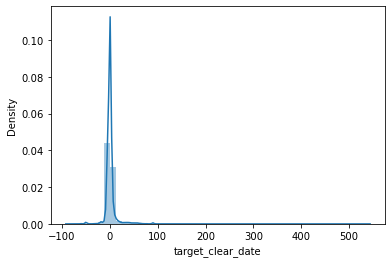

In [39]:
sns.distplot(y_train)

<AxesSubplot:xlabel='target_clear_date', ylabel='Count'>

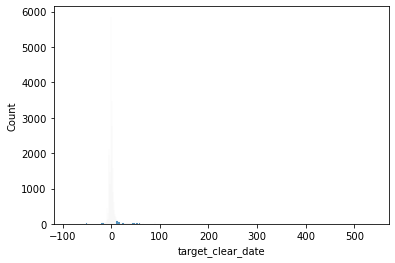

In [40]:
sns.histplot(y_train)

In [41]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,document_type,total_open_amount,baseline_create_date,cust_payment_terms,target_clear_date
0,29935,U001,0200769623,WAL-MAR co,2019-01-10,2019,1928543244,2018-12-30,2018-12-30,2019-01-14,RV,39952.53,2018-12-30,NAH4,-4.0
1,47647,U001,0200769623,WAL-MAR co,2019-01-10,2019,1928544067,2018-12-30,2018-12-30,2019-01-14,RV,1210.06,2018-12-30,NAH4,-4.0
2,14623,U001,0200769623,WAL-MAR associates,2019-01-09,2019,1928539939,2018-12-30,2018-12-29,2019-01-14,RV,1391.99,2018-12-30,NAH4,-5.0
3,49593,U001,0200769623,WAL-MAR us,2019-01-09,2019,1928538533,2018-12-30,2018-12-29,2019-01-14,RV,3794.88,2018-12-30,NAH4,-5.0
4,18264,U013,0140103335,PARAM associates,2019-01-23,2019,1991819925,2018-12-30,2018-12-26,2019-01-29,RV,13230.19,2018-12-30,NAVE,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,7698,U001,0200029010,KROG co,2019-10-22,2019,1929983418,2019-10-07,2019-10-08,2019-10-22,RV,70222.30,2019-10-07,NAA8,0.0
27996,49055,U001,CCU002,KRFT FDS foundation,2019-11-27,2019,1929959006,2019-10-07,2019-10-03,2019-11-11,RV,8917.36,2019-10-07,NAG2,16.0
27997,26600,U001,0200780383,MEIJ,2019-10-23,2019,1929982312,2019-10-07,2019-10-07,2019-10-22,RV,78248.38,2019-10-07,NAA8,1.0
27998,7756,U001,0200592182,DECA trust,2019-10-16,2019,1929976451,2019-10-07,2019-10-07,2019-10-24,RV,1061.18,2019-10-01,NAM4,-8.0


<AxesSubplot:xlabel='target_clear_date', ylabel='clear_date'>

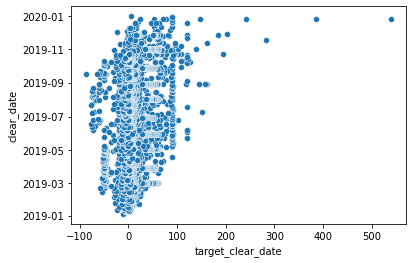

In [42]:
sns.scatterplot(data = X_train.merge(y_train,on=X_train.index), x = "target_clear_date" , y = "clear_date")

<AxesSubplot:xlabel='target_clear_date', ylabel='total_open_amount'>

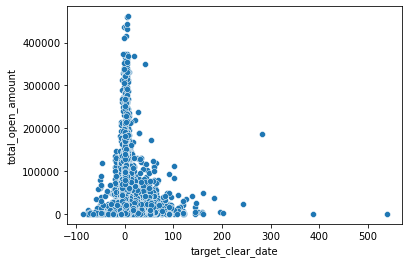

In [43]:
sns.scatterplot(data = X_train.merge(y_train,on=X_train.index), x = "target_clear_date" , y = "total_open_amount")

## Feature Engineering

Changing values to int or float format

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
#Encoding the values of name_customer to name_customer_enc using LabelEncoder
name_customer_enc = LabelEncoder()
name_customer_enc.fit(X_train["name_customer"])
X_train["name_customer_enc"]=name_customer_enc.transform(X_train["name_customer"])

In [46]:
document_type_enc = LabelEncoder()
document_type_enc.fit(X_train["document_type"])
X_train["document_type_enc"]=document_type_enc.transform(X_train["document_type"])

In [47]:
document_type_enc.fit(X_test["document_type"])
X_test["document_type_enc"]=document_type_enc.transform(X_test["document_type"])

In [48]:
document_type_enc.fit(X_val["document_type"])
X_val["document_type_enc"]=document_type_enc.transform(X_val["document_type"])

In [49]:
name_customer_enc.fit(X_test["name_customer"])
X_test["name_customer_enc"]=name_customer_enc.transform(X_test["name_customer"])

In [50]:
name_customer_enc.fit(X_val["name_customer"])
X_val["name_customer_enc"]=name_customer_enc.transform(X_val["name_customer"])

In [51]:
#dropping the values of name customer in train,val and test
X_train.drop(["name_customer"],inplace=True,axis=1)
X_val.drop(["name_customer"],inplace=True,axis=1)
X_test.drop(["name_customer"],inplace=True,axis=1)

In [52]:
#creating a function nethi_adi for dropping the future values of X_train,X_val,X_test
def nethi_adi(col , traindf = X_train,valdf =X_val,testdf =X_test):
    traindf.drop(col,inplace=True,axis=1)
    valdf.drop(col,inplace=True,axis=1)
    testdf.drop(col,inplace=True,axis=1)
    return traindf,valdf,testdf

## Changing the date values into seperate columns as Year, Day and month 

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 29935 to 1390
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         28000 non-null  object        
 1   cust_number           28000 non-null  object        
 2   clear_date            28000 non-null  datetime64[ns]
 3   buisness_year         28000 non-null  int32         
 4   doc_id                28000 non-null  int32         
 5   posting_date          28000 non-null  datetime64[ns]
 6   document_create_date  28000 non-null  datetime64[ns]
 7   due_in_date           28000 non-null  datetime64[ns]
 8   document_type         28000 non-null  object        
 9   total_open_amount     28000 non-null  float64       
 10  baseline_create_date  28000 non-null  datetime64[ns]
 11  cust_payment_terms    28000 non-null  object        
 12  name_customer_enc     28000 non-null  int32         
 13  document_type

In [54]:

X_train["year_baseline_create_date"]= X_train["baseline_create_date"].dt.year
X_val["year_baseline_create_date"]= X_val["baseline_create_date"].dt.year
X_test["week_baseline_create_date"]= X_test["baseline_create_date"].dt.year

X_train["day_baseline_create_date"]= X_train["baseline_create_date"].dt.day
X_val["day_baseline_create_date"]= X_val["baseline_create_date"].dt.day
X_test["day_baseline_create_date"]= X_test["baseline_create_date"].dt.day

X_train["month_baseline_create_date"]= X_train["baseline_create_date"].dt.month
X_val["month_baseline_create_date"]= X_val["baseline_create_date"].dt.month
X_test["month_baseline_create_date"]= X_test["baseline_create_date"].dt.month

In [55]:
X_train,X_val,X_test = nethi_adi(["baseline_create_date"])

In [56]:

X_train["year_posting_date"]= X_train["posting_date"].dt.year
X_val["year_posting_date"]= X_val["posting_date"].dt.year
X_test["week_posting_date"]= X_test["posting_date"].dt.year

X_train["day_posting_date"]= X_train["posting_date"].dt.day
X_val["day_posting_day"]= X_val["posting_date"].dt.day
X_test["day_posting_day"]= X_test["posting_date"].dt.day

X_train["month_posting_date"]= X_train["posting_date"].dt.month
X_val["month_posting_date"]= X_val["posting_date"].dt.month
X_test["month_posting_date"]= X_test["posting_date"].dt.month

In [57]:
X_train,X_val,X_test = nethi_adi(["posting_date"])

In [58]:
X_train["year_due_in_date"]= X_train["due_in_date"].dt.year
X_val["year_due_in_date"]= X_val["due_in_date"].dt.year
X_test["year_due_in_date"]= X_test["due_in_date"].dt.year

X_train["day_due_in_date"]= X_train["due_in_date"].dt.day
X_val["day_due_in_date"]= X_val["due_in_date"].dt.day
X_test["day_due_in_date"]= X_test["due_in_date"].dt.day

X_train["month_due_in_date"]= X_train["due_in_date"].dt.month
X_val["month_due_in_date"]= X_val["due_in_date"].dt.month
X_test["month_due_in_date"]= X_test["due_in_date"].dt.month

In [59]:
X_train,X_val,X_test = nethi_adi(["due_in_date"])

In [60]:
X_train["year_document_create_date"]= X_train["document_create_date"].dt.year
X_val["year_document_create_date"]= X_val["document_create_date"].dt.year
X_test["year_document_create_date"]= X_test["document_create_date"].dt.year

X_train["day_document_create_date"]= X_train["document_create_date"].dt.day
X_val["day_document_create_date"]= X_val["document_create_date"].dt.day
X_test["day_document_create_date"]= X_test["document_create_date"].dt.day

X_train["month_document_create_date"]= X_train["document_create_date"].dt.month
X_val["month_document_create_date"]= X_val["document_create_date"].dt.month
X_test["month_document_create_date"]= X_test["document_create_date"].dt.month

In [61]:
X_train,X_val,X_test = nethi_adi(["document_create_date"])

In [62]:
#Encoding the values of cust_payment_terms to cust_payment_terms_enc using LabelEncoder
cust_payment_terms_enc = LabelEncoder()
cust_payment_terms_enc.fit(X_train["cust_payment_terms"])
X_train["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(X_train["cust_payment_terms"])

In [63]:
cust_payment_terms_enc.fit(X_val["cust_payment_terms"])
X_val["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(X_val["cust_payment_terms"])
cust_payment_terms_enc.fit(X_test["cust_payment_terms"])
X_test["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(X_test["cust_payment_terms"])

In [64]:
X_train,X_val,X_test = nethi_adi(["cust_payment_terms"])

Splitting the mixed column to Labels's and numericals seperately

In [65]:
mixed_cust_num="cust_number"
mixed_num_in_cust_num= mixed_cust_num + "_numerical"
mixed_label_in_cust_num= mixed_cust_num + "_label"

In [66]:
X_train[mixed_num_in_cust_num]=X_train[mixed_cust_num].str.extract('(\d+)')

In [67]:
X_train[mixed_label_in_cust_num]=X_train[mixed_cust_num].str[:3]

In [68]:
X_train["cust_number_numerical"]=X_train.cust_number_numerical.astype(int)

In [69]:
X_val[mixed_num_in_cust_num]=X_val[mixed_cust_num].str.extract('(\d+)')
X_val[mixed_label_in_cust_num]=X_val[mixed_cust_num].str[:3]
X_val["cust_number_numerical"]=X_val.cust_number_numerical.astype(int)

X_test[mixed_num_in_cust_num]=X_test[mixed_cust_num].str.extract('(\d+)')
X_test[mixed_label_in_cust_num]=X_test[mixed_cust_num].str[:3]
X_test["cust_number_numerical"]=X_test.cust_number_numerical.astype(int)

In [70]:
cust_number_label_enc = LabelEncoder()
cust_number_label_enc.fit(X_train["cust_number_label"])
X_train["cust_number_label_enc"]=cust_number_label_enc.transform(X_train["cust_number_label"])

In [71]:
cust_number_label_enc.fit(X_val["cust_number_label"])
X_val["cust_number_label_enc"]=cust_number_label_enc.transform(X_val["cust_number_label"])
cust_number_label_enc.fit(X_test["cust_number_label"])
X_test["cust_number_label_enc"]=cust_number_label_enc.transform(X_test["cust_number_label"])

In [72]:
X_train,X_val,X_test = nethi_adi(["cust_number"])
X_train,X_val,X_test = nethi_adi(["cust_number_label"])

In [73]:
#Encoding the values of business_code to business_code_enc using LabelEncoder
business_code_enc = LabelEncoder()
business_code_enc.fit(X_train["business_code"])
X_train["business_code_enc"]=business_code_enc.transform(X_train["business_code"])

business_code_enc.fit(X_val["business_code"])
X_val["business_code_enc"]=business_code_enc.transform(X_val["business_code"])

business_code_enc.fit(X_test["business_code"])
X_test["business_code_enc"]=business_code_enc.transform(X_test["business_code"])

In [74]:
X_train,X_val,X_test = nethi_adi(["business_code"])

In [75]:
X_train,X_val,X_test = nethi_adi(["clear_date"])

In [76]:
X_train,X_val,X_test = nethi_adi(["document_type"])

## Feature Selection

In [77]:
X_train.merge(y_train,on=X_train.index).corr()

,key_0,buisness_year,doc_id,total_open_amount,name_customer_enc,document_type_enc,year_baseline_create_date,day_baseline_create_date,month_baseline_create_date,year_posting_date,day_posting_date,month_posting_date,year_due_in_date,day_due_in_date,month_due_in_date,year_document_create_date,day_document_create_date,month_document_create_date,cust_payment_terms_enc,cust_number_numerical,cust_number_label_enc,business_code_enc,target_clear_date
key_0,1.000000,NaN,-0.002004,-0.002976,0.007087,-0.005837,0.005904,0.002938,0.007999,0.005012,0.004611,0.007774,0.003511,-0.006089,0.008699,0.002831,0.000483,0.008668,0.000942,-0.006254,0.007120,-0.005437,0.005024
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc_id,-0.002004,NaN,1.000000,-0.198806,0.016609,-0.054886,-0.009886,-0.000535,-0.015972,0.001323,-0.004997,-0.008842,0.019033,0.003533,0.005280,-0.008843,-0.006207,-0.008176,0.510146,0.313505,0.169582,0.912454,-0.131674
total_open_amount,-0.002976,NaN,-0.198806,1.000000,-0.017851,-0.008185,-0.000730,0.031936,0.013406,-0.002754,0.022973,0.011154,0.000986,-0.010353,0.003590,0.002247,0.026561,0.010968,-0.214974,-0.018456,-0.075098,-0.187437,0.001900
name_customer_enc,0.007087,NaN,0.016609,-0.017851,1.000000,0.003571,-0.009148,0.038852,-0.002668,-0.011637,0.006735,-0.001561,0.007165,0.000426,-0.013166,-0.017411,0.006490,0.000728,0.106063,0.122326,-0.020403,-0.005571,-0.028888
document_type_enc,-0.005837,NaN,-0.054886,-0.008185,0.003571,1.000000,-0.065125,0.007527,-0.004643,0.001101,0.023917,-0.012261,-0.377850,-0.006216,-0.004289,0.001355,0.023977,-0.012223,-0.028423,-0.016159,-0.012056,-0.049913,0.217857
year_baseline_create_date,0.005904,NaN,-0.009886,-0.000730,-0.009148,-0.065125,1.000000,-0.112695,-0.173884,0.954781,-0.110854,-0.167647,0.174344,0.011472,0.112082,0.769527,-0.103144,-0.164766,-0.006488,-0.009609,0.009735,-0.009527,-0.041853
day_baseline_create_date,0.002938,NaN,-0.000535,0.031936,0.038852,0.007527,-0.112695,1.000000,-0.039673,-0.103902,0.947673,-0.037314,-0.012404,-0.354812,0.073764,-0.041496,0.767700,-0.034862,-0.011873,-0.005226,-0.010910,0.000675,-0.004447
month_baseline_create_date,0.007999,NaN,-0.015972,0.013406,-0.002668,-0.004643,-0.173884,-0.039673,1.000000,-0.160854,-0.034162,0.996052,-0.022682,0.009707,0.932587,-0.083374,-0.017690,0.972300,0.007398,-0.001373,-0.026456,-0.012509,0.000351
year_posting_date,0.005012,NaN,0.001323,-0.002754,-0.011637,0.001101,0.954781,-0.103902,-0.160854,1.000000,-0.115841,-0.178204,0.042308,0.012419,0.119454,0.800356,-0.106511,-0.173184,-0.000909,-0.005919,0.012598,0.001455,-0.003005


<AxesSubplot:title={'center':'Pearson Correlation Features'}>

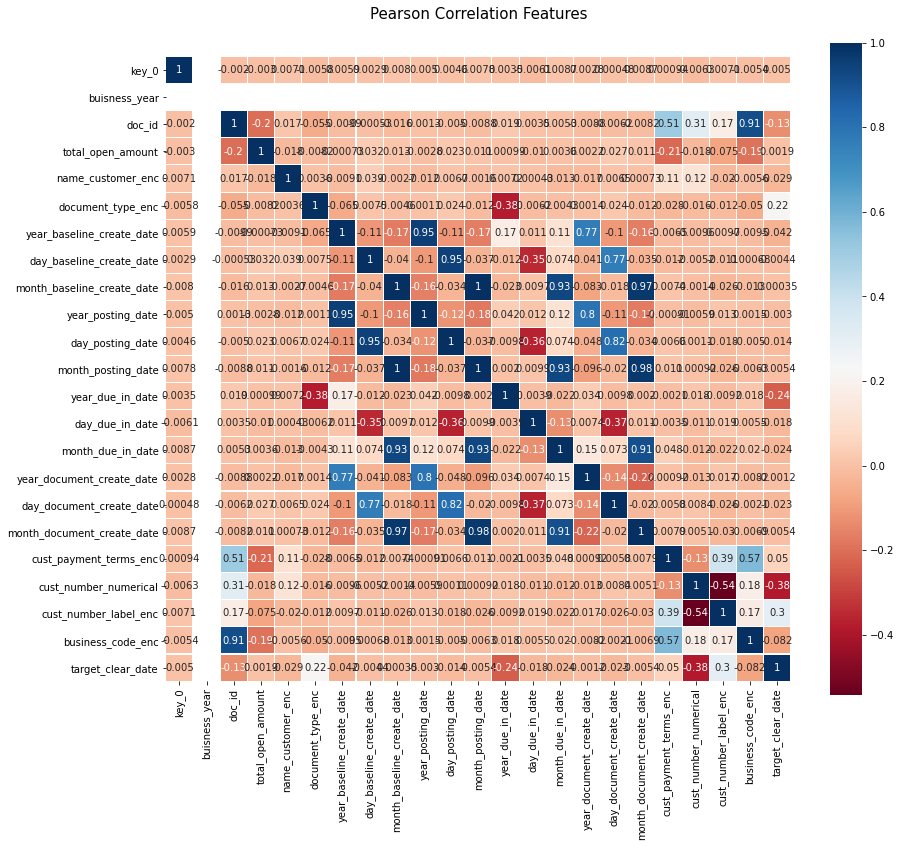

In [78]:
#Plotting colormap
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title("Pearson Correlation Features",y=1.05,size=15)
sns.heatmap(X_train.merge(y_train,on=X_train.index).corr(),linewidths=0.1,vmax=1.0,
           square=True, cmap=colormap, linecolor="white", annot=True)

## Modelling

Random Forest Regressor

In [79]:
from sklearn.metrics import mean_squared_error


In [80]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=0 , max_depth=4)

In [81]:
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [82]:
predicted =regressor.predict(X_val)

In [83]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

23.9886810031413

In [84]:
mean_squared_error(y_val,predicted,squared=False)

31.47321921328891

## The lost data

In [85]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,target_clear_date
10,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930632e+09,2020-03-10,20200310,20200310,2020-03-25,USD,RV,1.0,NaN,57604.43,20200310.0,NAH4,1.930632e+09,1,NaN
17,U001,200418007,AM associates,NaT,2020.0,1.930859e+09,2020-05-05,20200505,20200505,2020-07-09,USD,RV,1.0,NaN,12655.44,20200505.0,NAGD,1.930859e+09,1,NaN
18,U001,0200936373,SUPE in,NaT,2020.0,1.930714e+09,2020-03-30,20200328,20200330,2020-04-14,USD,RV,1.0,NaN,40432.30,20200330.0,NAA8,1.930714e+09,1,NaN
28,U001,0200769623,WAL-MAR systems,NaT,2020.0,1.930629e+09,2020-03-10,20200310,20200310,2020-03-25,USD,RV,1.0,NaN,13511.77,20200310.0,NAH4,1.930629e+09,1,NaN
29,U001,0200726979,BJ'S llc,NaT,2020.0,1.930623e+09,2020-03-09,20200309,20200309,2020-03-24,USD,RV,1.0,NaN,1097.37,20200309.0,NAA8,1.930623e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49965,U001,0200936373,SUPE us,NaT,2020.0,1.930748e+09,2020-04-04,20200404,20200404,2020-04-19,USD,RV,1.0,NaN,93097.82,20200404.0,NAA8,1.930748e+09,1,NaN
49969,U001,0200772670,ASSOCIAT associates,NaT,2020.0,1.930646e+09,2020-03-12,20200313,20200312,2020-03-27,USD,RV,1.0,NaN,21702.22,20200312.0,NAU5,1.930646e+09,1,NaN
49975,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930606e+09,2020-03-04,20200305,20200304,2020-03-19,USD,RV,1.0,NaN,15504.40,20200304.0,NAH4,1.930606e+09,1,NaN
49980,U001,0200726979,BJ'S associates,NaT,2020.0,1.930833e+09,2020-04-28,20200428,20200428,2020-05-13,USD,RV,1.0,NaN,24918.62,20200428.0,NAA8,1.930833e+09,1,NaN


In [86]:
main_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
target_clear_date         10000
dtype: int64

## Doing the same preprocessing and Feature engineering steps

In [87]:
#Removing the target clear date and clear date from X_main_test
X_main_test= main_test.drop(["target_clear_date","clear_date"],axis =1)
X_main_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
10,U001,0200769623,WAL-MAR in,2020.0,1.930632e+09,2020-03-10,20200310,20200310,2020-03-25,USD,RV,1.0,NaN,57604.43,20200310.0,NAH4,1.930632e+09,1
17,U001,200418007,AM associates,2020.0,1.930859e+09,2020-05-05,20200505,20200505,2020-07-09,USD,RV,1.0,NaN,12655.44,20200505.0,NAGD,1.930859e+09,1
18,U001,0200936373,SUPE in,2020.0,1.930714e+09,2020-03-30,20200328,20200330,2020-04-14,USD,RV,1.0,NaN,40432.30,20200330.0,NAA8,1.930714e+09,1
28,U001,0200769623,WAL-MAR systems,2020.0,1.930629e+09,2020-03-10,20200310,20200310,2020-03-25,USD,RV,1.0,NaN,13511.77,20200310.0,NAH4,1.930629e+09,1
29,U001,0200726979,BJ'S llc,2020.0,1.930623e+09,2020-03-09,20200309,20200309,2020-03-24,USD,RV,1.0,NaN,1097.37,20200309.0,NAA8,1.930623e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49965,U001,0200936373,SUPE us,2020.0,1.930748e+09,2020-04-04,20200404,20200404,2020-04-19,USD,RV,1.0,NaN,93097.82,20200404.0,NAA8,1.930748e+09,1
49969,U001,0200772670,ASSOCIAT associates,2020.0,1.930646e+09,2020-03-12,20200313,20200312,2020-03-27,USD,RV,1.0,NaN,21702.22,20200312.0,NAU5,1.930646e+09,1
49975,U001,0200769623,WAL-MAR associates,2020.0,1.930606e+09,2020-03-04,20200305,20200304,2020-03-19,USD,RV,1.0,NaN,15504.40,20200304.0,NAH4,1.930606e+09,1
49980,U001,0200726979,BJ'S associates,2020.0,1.930833e+09,2020-04-28,20200428,20200428,2020-05-13,USD,RV,1.0,NaN,24918.62,20200428.0,NAA8,1.930833e+09,1


In [88]:
# Also removing both from main_test
main_test.drop(["target_clear_date","clear_date"],inplace=True,axis=1)

In [89]:
#Changing the dtype of the following
X_main_test["doc_id"]=X_main_test.doc_id.astype(int)
X_main_test["buisness_year"]=X_main_test.buisness_year.astype(int)


In [90]:
X_main_test.drop("invoice_id",axis=1,inplace=True) #removing invoice id

In [91]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10 to 49991
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   name_customer           10000 non-null  object        
 3   buisness_year           10000 non-null  int32         
 4   doc_id                  10000 non-null  int32         
 5   posting_date            10000 non-null  object        
 6   document_create_date    10000 non-null  int64         
 7   document_create_date.1  10000 non-null  int64         
 8   due_in_date             10000 non-null  datetime64[ns]
 9   invoice_currency        10000 non-null  object        
 10  document type           10000 non-null  object        
 11  posting_id              10000 non-null  float64       
 12  area_business           0 non-null      float

In [92]:
X_main_test["posting_date"]= pd.to_datetime(X_main_test["posting_date"])
X_main_test["document_create_date"]= pd.to_datetime(X_main_test.document_create_date,format='%Y%m%d')
X_main_test["baseline_create_date"]= pd.to_datetime(X_main_test.baseline_create_date,format='%Y%m%d')
#### Converting into datetime format


In [93]:
X_main_test.rename(columns={"document_create_date.1":"document_create_date1"}, inplace=True)

In [94]:
X_main_test["document_create_date1"]= pd.to_datetime(X_main_test.document_create_date1,format='%Y%m%d')

In [95]:
X_main_test.drop("document_create_date1",axis=1,inplace=True)
X_main_test.drop("area_business",axis=1,inplace=True)

In [96]:
X_main_test.business_code.value_counts()

U001    9215
CA02     669
U013      78
U002      37
U005       1
Name: business_code, dtype: int64

In [97]:
X_main_test["business_code"]= np.where(X_main_test["business_code"].isin(["U005"]),"Others",X_main_test["business_code"])

In [98]:
X_main_test.sort_values(by=["posting_date"],inplace=True)

In [99]:
X_main_test.rename(columns={"document type":"document_type"}, inplace=True)

In [100]:
X_main_test.posting_id.value_counts()

1.0    10000
Name: posting_id, dtype: int64

In [101]:
X_main_test.rename(columns={"isOpen":"is_open"}, inplace=True)

In [102]:
X_main_test.is_open.value_counts()

1    10000
Name: is_open, dtype: int64

In [103]:
X_main_test.drop("posting_id",axis=1,inplace=True)
X_main_test.drop("is_open",axis=1,inplace=True)

In [104]:
X_main_test.drop("invoice_currency",axis=1,inplace=True)

In [105]:
X_main_test.document_type.value_counts()

RV    10000
Name: document_type, dtype: int64

In [106]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 21607 to 27878
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         10000 non-null  object        
 1   cust_number           10000 non-null  object        
 2   name_customer         10000 non-null  object        
 3   buisness_year         10000 non-null  int32         
 4   doc_id                10000 non-null  int32         
 5   posting_date          10000 non-null  datetime64[ns]
 6   document_create_date  10000 non-null  datetime64[ns]
 7   due_in_date           10000 non-null  datetime64[ns]
 8   document_type         10000 non-null  object        
 9   total_open_amount     10000 non-null  float64       
 10  baseline_create_date  10000 non-null  datetime64[ns]
 11  cust_payment_terms    10000 non-null  object        
dtypes: datetime64[ns](4), float64(1), int32(2), object(5)
memory usage: 93

In [107]:
name_customer_enc = LabelEncoder()
name_customer_enc.fit(X_main_test["name_customer"])
X_main_test["name_customer_enc"]=name_customer_enc.transform(X_main_test["name_customer"])

In [108]:
document_type_enc = LabelEncoder()
document_type_enc.fit(X_main_test["document_type"])
X_main_test["document_type_enc"]=document_type_enc.transform(X_main_test["document_type"])

In [109]:
X_main_test.drop(["name_customer"],inplace=True,axis=1)

In [110]:
def nethi_adi(col , traindf = X_main_test):
    traindf.drop(col,inplace=True,axis=1)
    return traindf

In [111]:
X_main_test["year_baseline_create_date"]= X_main_test["baseline_create_date"].dt.year
X_main_test["day_baseline_create_date"]= X_main_test["baseline_create_date"].dt.day
X_main_test["month_baseline_create_date"]= X_main_test["baseline_create_date"].dt.month

X_main_test["year_posting_date"]= X_main_test["posting_date"].dt.year
X_main_test["day_posting_date"]= X_main_test["posting_date"].dt.day
X_main_test["month_posting_date"]= X_main_test["posting_date"].dt.month

X_main_test["year_due_in_date"]= X_main_test["due_in_date"].dt.year
X_main_test["day_due_in_date"]= X_main_test["due_in_date"].dt.day
X_main_test["month_due_in_date"]= X_main_test["due_in_date"].dt.month

X_main_test["year_document_create_date"]= X_main_test["document_create_date"].dt.year
X_main_test["day_document_create_date"]= X_main_test["document_create_date"].dt.day
X_main_test["month_document_create_date"]= X_main_test["document_create_date"].dt.month


In [112]:
X_main_test = nethi_adi(["document_create_date"])
X_main_test = nethi_adi(["due_in_date"])
X_main_test = nethi_adi(["posting_date"])
X_main_test = nethi_adi(["document_type"])
X_main_test = nethi_adi(["baseline_create_date"])

In [113]:
cust_payment_terms_enc = LabelEncoder()
cust_payment_terms_enc.fit(X_main_test["cust_payment_terms"])
X_main_test["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(X_main_test["cust_payment_terms"])

In [114]:
X_main_test= nethi_adi(["cust_payment_terms"])

In [115]:
mixed_cust_num="cust_number"
mixed_num_in_cust_num= mixed_cust_num + "_numerical"
mixed_label_in_cust_num= mixed_cust_num + "_label"

In [116]:
X_main_test[mixed_num_in_cust_num]=X_main_test[mixed_cust_num].str.extract('(\d+)')

In [117]:
X_main_test[mixed_label_in_cust_num]=X_main_test[mixed_cust_num].str[:3]

In [118]:
X_main_test["cust_number_numerical"]=X_main_test.cust_number_numerical.astype(int)

In [119]:
cust_number_label_enc = LabelEncoder()
cust_number_label_enc.fit(X_main_test["cust_number_label"])
X_main_test["cust_number_label_enc"]=cust_number_label_enc.transform(X_main_test["cust_number_label"])

In [120]:
X_main_test = nethi_adi(["cust_number"])
X_main_test = nethi_adi(["cust_number_label"])

In [121]:
business_code_enc = LabelEncoder()
business_code_enc.fit(X_main_test["business_code"])
X_main_test["business_code_enc"]=business_code_enc.transform(X_main_test["business_code"])

In [122]:
X_main_test = nethi_adi(["business_code"])

In [123]:
X_main_test.columns

Index(['buisness_year', 'doc_id', 'total_open_amount', 'name_customer_enc',
       'document_type_enc', 'year_baseline_create_date',
       'day_baseline_create_date', 'month_baseline_create_date',
       'year_posting_date', 'day_posting_date', 'month_posting_date',
       'year_due_in_date', 'day_due_in_date', 'month_due_in_date',
       'year_document_create_date', 'day_document_create_date',
       'month_document_create_date', 'cust_payment_terms_enc',
       'cust_number_numerical', 'cust_number_label_enc', 'business_code_enc'],
      dtype='object')

In [124]:
X_train.columns

Index(['buisness_year', 'doc_id', 'total_open_amount', 'name_customer_enc',
       'document_type_enc', 'year_baseline_create_date',
       'day_baseline_create_date', 'month_baseline_create_date',
       'year_posting_date', 'day_posting_date', 'month_posting_date',
       'year_due_in_date', 'day_due_in_date', 'month_due_in_date',
       'year_document_create_date', 'day_document_create_date',
       'month_document_create_date', 'cust_payment_terms_enc',
       'cust_number_numerical', 'cust_number_label_enc', 'business_code_enc'],
      dtype='object')

## Both the dataframes are having same number of columns

## The Finale

In [125]:
random_model=RandomForestRegressor()

In [126]:
random_model.fit(X_train, y_train)

prediction = random_model.predict(X_main_test)    # starting to predict

#Checking the accuracy
random_model_accuracy = round(random_model.score(X_train, y_train)*100,2)
print(round(random_model_accuracy,2),'%')

92.66 %


In [127]:
real_time_data = random_model.predict(X_main_test)
real_time_data

array([ 0.87, -4.53, 11.72, ...,  2.26, 10.62, 11.91])

In [128]:
final_result = pd.Series(prediction,name='Predicted')

In [129]:
Final = main_test.merge(final_result , on = X_main_test.index )
 #Merging and getting the final series

## Bucketlist

In [130]:
def Mapping(x):
    temp = []
    for i in list(x):
        if i < 0:
            temp.append(" before due ")
        elif i == 0:
            temp.append(" on due ")
        else:
            temp.append(" after due ")
    
    return temp

col = Mapping(real_time_data)
bucket = pd.DataFrame()
bucket['Predictions'] = real_time_data
bucket['Bucket_list'] = col
bucket.head()

,Predictions,Bucket_list
0,0.87,after due
1,-4.53,before due
2,11.72,after due
3,-1.99,before due
4,0.32,after due


In [131]:
bucket

,Predictions,Bucket_list
0,0.87,after due
1,-4.53,before due
2,11.72,after due
3,-1.99,before due
4,0.32,after due
...,...,...
9995,18.54,after due
9996,-6.60,before due
9997,2.26,after due
9998,10.62,after due


# 